In [33]:
%run -n ./utility.ipynb

# Random Forrest classifier

In [34]:
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

## Random parameter search

In [35]:
criterion =['entropy', 'gini', 'log_loss']
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 400)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
min_samples_split = [int(x) for x in np.linspace(2, 10, num = 9)]
min_samples_leaf = [int(x) for x in np.linspace(1, 10, num = 10)]
max_leaf_nodes = [int(x) for x in np.linspace(10, 500, num = 490)]

random_grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_leaf_nodes': max_leaf_nodes}

print(random_grid)

{'criterion': ['entropy', 'gini', 'log_loss'], 'n_estimators': [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 2

In [36]:
rfc_random = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid, n_iter=100, cv=5, verbose=0, random_state=42, n_jobs=-1)
rfc_random.fit(X_train, y_train)
best_random_params = rfc_random.best_params_

c:\Users\Arne\anaconda3\envs\ml_proj\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
86 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Arne\anaconda3\envs\ml_proj\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Arne\anaconda3\envs\ml_proj\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Arne\anaconda3\envs\ml_proj\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
 

In [37]:
best_random_params

{'n_estimators': 161,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_leaf_nodes': 414,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'entropy'}

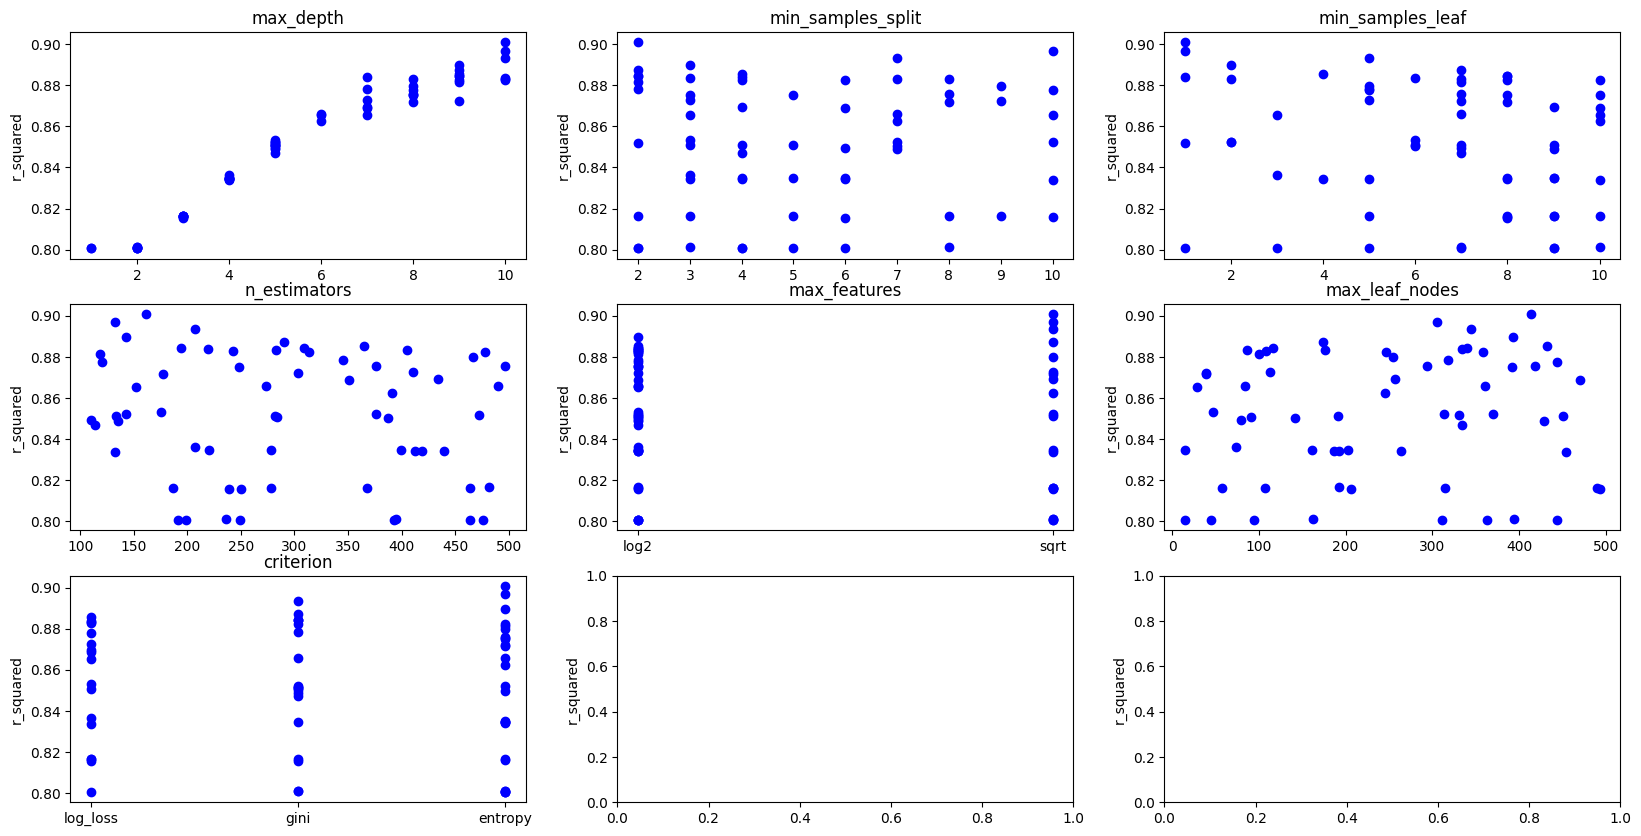

In [38]:
out = pd.DataFrame(rfc_random.cv_results_)
out.head()

xlabel_names = ['param_max_depth','param_min_samples_split','param_min_samples_leaf','param_n_estimators',
                'param_max_features', 'param_max_leaf_nodes', 'param_criterion']

fig, axs = plt.subplots(3,3, figsize=(20,10))

axs[0,0].scatter(out['param_max_depth'], out['mean_test_score'], c='blue');
axs[0,0].set_title('max_depth')

axs[0,1].scatter(out['param_min_samples_split'], out['mean_test_score'], c='blue');
axs[0,1].set_title('min_samples_split')

axs[0,2].scatter(out['param_min_samples_leaf'], out['mean_test_score'], c='blue');
axs[0,2].set_title('min_samples_leaf')

axs[1,0].scatter(out['param_n_estimators'], out['mean_test_score'], c='blue');
axs[1,0].set_title('n_estimators')

axs[1,1].scatter(out['param_max_features'], out['mean_test_score'], c='blue');
axs[1,1].set_title('max_features')

axs[1,2].scatter(out['param_max_leaf_nodes'], out['mean_test_score'], c='blue');
axs[1,2].set_title('max_leaf_nodes')

axs[2,0].scatter(out['param_criterion'], out['mean_test_score'], c='blue');
axs[2,0].set_title('criterion')

for ax in axs.flat:
    ax.set(ylabel='r_squared')

## Grid search

In [39]:
param_grid = { 
    'n_estimators': [161, 150, 140, 165, 155],
    'min_samples_split': [2, 7, 10],
    'min_samples_leaf': [1, 5],
    'max_leaf_nodes': [414, 430, 440, 450],
    'max_features': ['sqrt'],
    'max_depth': [10],
    'criterion': ['entropy']
}

In [40]:
rfc_grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,verbose=0, n_jobs=-1)
rfc_grid.fit(X_train, y_train)
best_params = rfc_grid.best_params_

In [41]:
best_params

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': 414,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 140}

In [42]:
rfc_best = rfc_grid.best_estimator_

In [43]:
cv_scores = cross_val_score(rfc_best, X_train, y_train, cv=5)
print(cv_scores, np.mean(cv_scores))

[0.9067086  0.89087093 0.90241343 0.90870934 0.90136411] 0.9020132825613038


# Saving model

In [44]:
dump(rfc_best, "./models/rfc_best.joblib")

['./models/rfc_best.joblib']